## Case Study on Employee Performance

#### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("../DataSets/employee_performance_dataset.csv")

### Part A

#### 1. Load dataset and display first 5 records

In [32]:
data.head()

,Employee_ID,Name,Department,Age,Gender,Years_at_Company,Goals_Achieved,Projects_Completed,Trainings_Attended,Attendance_%,Customer_Feedback,Salary(LPA),Performance_Score
0,E1000,Seth,Sales,50,Male,11,12,5,1,74.679836,8,8.67,7.3
1,E1001,Maria,IT,45,Male,3,10,5,1,91.659963,6,3.01,6.3
2,E1002,Mary,HR,42,Male,1,16,10,5,70.211989,9,7.95,11.3
3,E1003,Kyle,Sales,49,Male,12,20,3,3,85.427033,9,3.79,10.4
4,E1004,Sandra,Marketing,28,Female,5,13,7,1,98.466566,2,9.55,7.7


#### 2. Check for missing values, datattype and descriptive statictics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         500 non-null    object 
 1   Name                500 non-null    object 
 2   Department          500 non-null    object 
 3   Age                 500 non-null    int64  
 4   Gender              500 non-null    object 
 5   Years_at_Company    500 non-null    int64  
 6   Goals_Achieved      500 non-null    int64  
 7   Projects_Completed  500 non-null    int64  
 8   Trainings_Attended  500 non-null    int64  
 9   Attendance_%        500 non-null    float64
 10  Customer_Feedback   500 non-null    int64  
 11  Salary(LPA)         500 non-null    float64
 12  Performance_Score   500 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 50.9+ KB


In [7]:
data.isna().sum()

Employee_ID           0
Name                  0
Department            0
Age                   0
Gender                0
Years_at_Company      0
Goals_Achieved        0
Projects_Completed    0
Trainings_Attended    0
Attendance_%          0
Customer_Feedback     0
Salary(LPA)           0
Performance_Score     0
dtype: int64

#### 3. Categirize employees into age group 22-30, 31-40 , 41-50, 51+.

In [10]:
data.groupby("Age")["Age"].value_counts()

Age
22    13
23    14
24    16
25    13
26    11
27    19
28     9
29    12
30     9
31    12
32    13
33    18
34    12
35    15
36    12
37    14
38    10
39    11
40    10
41    14
42    23
43    17
44    19
45     9
46    17
47    15
48    14
49    16
50    14
51     8
52     8
53    15
54     8
55    13
56    14
57    15
58    10
59     8
Name: count, dtype: int64

In [30]:
def find_age_range(age):
    if age>21 and age<31:
        return "22-30"
    elif age >30 and age<41:
        return "31-40"
    elif age >40 and age<51:
        return "41-50"
    else:
        return "51+" 

In [33]:
data["age group"]=data["Age"].apply(find_age_range)
data

,Employee_ID,Name,Department,Age,Gender,Years_at_Company,Goals_Achieved,Projects_Completed,Trainings_Attended,Attendance_%,Customer_Feedback,Salary(LPA),Performance_Score,age group
0,E1000,Seth,Sales,50,Male,11,12,5,1,74.679836,8,8.67,7.3,41-50
1,E1001,Maria,IT,45,Male,3,10,5,1,91.659963,6,3.01,6.3,41-50
2,E1002,Mary,HR,42,Male,1,16,10,5,70.211989,9,7.95,11.3,41-50
3,E1003,Kyle,Sales,49,Male,12,20,3,3,85.427033,9,3.79,10.4,41-50
4,E1004,Sandra,Marketing,28,Female,5,13,7,1,98.466566,2,9.55,7.7,22-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,E1495,James,IT,57,Female,3,5,10,3,91.771777,10,15.57,6.6,51+
496,E1496,Jesse,IT,27,Male,6,5,10,1,92.284749,2,4.57,5.4,22-30
497,E1497,Sean,Finance,42,Female,9,16,4,4,85.381792,10,19.94,9.4,41-50
498,E1498,Nicholas,Marketing,49,Male,1,15,9,0,77.260662,4,6.47,9.1,41-50


### Part B

#### 1.

In [13]:
dept_avg_performance=data.groupby("Department")["Performance_Score"].mean()
dept_avg_performance

Department
Finance      7.658654
HR           7.073404
IT           7.702041
Marketing    7.535714
Sales        7.691304
Name: Performance_Score, dtype: float64

#### 2.

In [19]:
top_ten=data.sort_values(by="Performance_Score",ascending=False).head(10)

In [14]:
data["Performance_Score"].max()

np.float64(12.3)

### 3.

In [20]:
avg_sal=data.groupby("Department")["Salary(LPA)"].mean()

Department
Finance      11.619423
HR           10.774149
IT           12.030306
Marketing    11.666875
Sales        11.684239
Name: Salary(LPA), dtype: float64

### 4.

In [22]:
gender_performace=data.groupby("Gender")["Performance_Score"].mean()
gender_performace

Gender
Female    7.528629
Male      7.542460
Name: Performance_Score, dtype: float64

### 5.

In [25]:
data_co_relation=data[["Attendance_%","Customer_Feedback","Trainings_Attended","Salary(LPA)","Performance_Score"]].corr()
data_co_relation

,Attendance_%,Customer_Feedback,Trainings_Attended,Salary(LPA),Performance_Score
Attendance_%,1.000000,0.026001,0.084055,-0.028859,-0.020084
Customer_Feedback,0.026001,1.000000,-0.051029,0.033866,0.133088
Trainings_Attended,0.084055,-0.051029,1.000000,0.003626,0.167928
Salary(LPA),-0.028859,0.033866,0.003626,1.000000,-0.004368
Performance_Score,-0.020084,0.133088,0.167928,-0.004368,1.000000


## Part C

### 1.

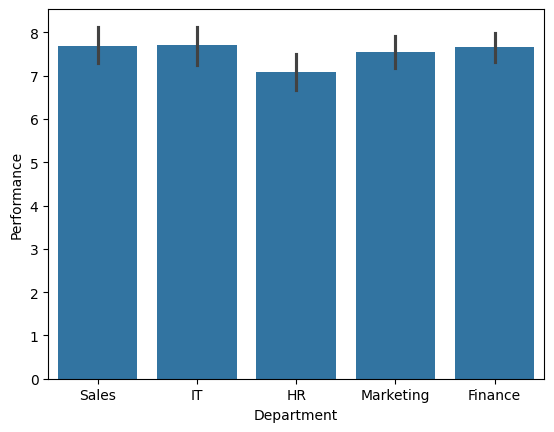

In [29]:
sns.barplot(data=data, x="Department",y="Performance_Score")
plt.ylabel("Performance")
plt.show()

#### 2.

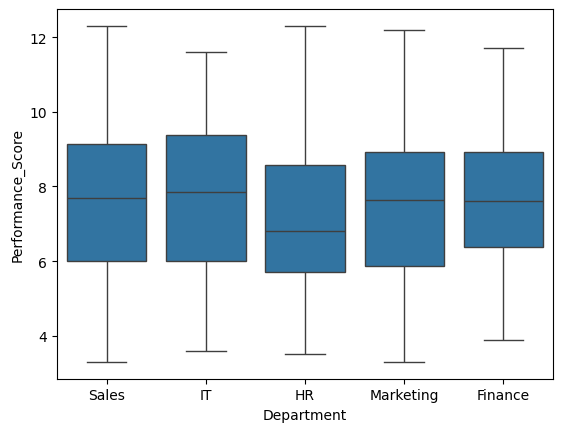

In [35]:
sns.boxplot(data=data, x="Department",y="Performance_Score")
plt.show()

#### 3.

<Axes: xlabel='Age', ylabel='Count'>

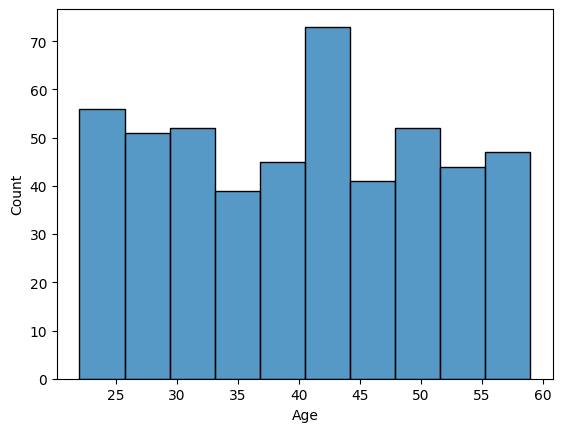

In [36]:
sns.histplot(data["Age"])

In [ ]:
sns.heatmap("")

<Axes: xlabel='Salary(LPA)', ylabel='Performance_Score'>

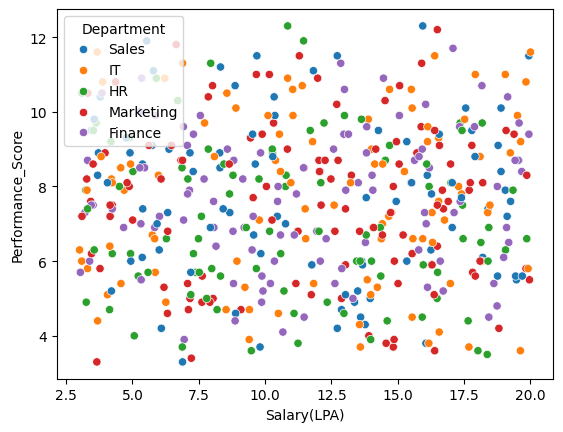

In [37]:
sns.scatterplot(data=data,hue="Department",  x="Salary(LPA)",y="Performance_Score")